# Boundary value problems

Consider the initial value problem
$$
    y''+p(x)y'+q(x)y=0;\hspace{5mm}y(a)=0,\hspace{5mm}y'(a)=0.\tag{1}
$$
The trivial solution $y(x)\equiv0$ clearly satisfies the equation and the initial conditions. Furthermore, Theorem 10.2 guarantees that, provided $p$ and $q$ are continuous, this solution is unique, i.e. there are no nontrivial solutions; however, the situation is radically different for a problem such as
$$
     y''+p(x)y'+q(x)y=0;\hspace{5mm}y(a)=0,\hspace{5mm}y(b)=0.\tag{2}
$$
The difference between (1) and (2) is that the conditions in (2) are imposed at two *different* points $a$ and $b$, with $a<b$, say. Problem (2) is an example of an *endpoint problem*, or *boundary value problem* and the conditions $y(a)=0,y(b)=0$ are known as *boundary conditions*.

**Example 12.1.** Consider the boundary value problem
$$
    y''+3y=0;\hspace{5mm}y(0)=y(\pi)=0.
$$
The general solution to the differential equation is
$$
    y(x)=A\cos\left(\sqrt{3}x\right)+B\sin\left(\sqrt{3}x\right).
$$
The condition $y(0)=0$ implies $A=0$ and so we seek solutions of the form $y(x)=B\sin\left(\sqrt{3}x\right)$. Let's see visually if we can find a value of $B$ which gives the desired value of the function at the right-hand boundary, i.e. a value of $B$ for which $y(\pi)=0$. This process is often called *shooting*, since we examine all possible solutions with the correct value at the left-hand boundary and then "shoot" for the correct "target" value at the right-hand boundary:

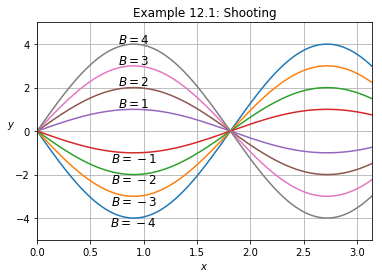

In [1]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt
%matplotlib inline

x_range = (0, pi)
y_range = (-5, 5)

plt.title('Example 12.1: Shooting')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

x = np.linspace(x_range[0], x_range[1], 1000)
def y(x, B):
    return B*np.sin(np.sqrt(3)*x)

for B in (-4, -3, -2, -1, 1, 2, 3, 4):
    plt.plot(x, y(x, B))
    
for B in (-4, -3, -2, -1):
    plt.text(pi/2/np.sqrt(3), y(pi/4, B),'$B='+str(B)+'$', fontsize = 12,
             va = 'top', ha = 'center')
for B in (1, 2, 3, 4):
    plt.text(pi/2/np.sqrt(3), y(pi/4, B),'$B='+str(B)+'$', fontsize = 12,
             va = 'bottom', ha = 'center')

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()

From the above plot, it would seem that the only solution is the trivial one. Indeed, the second boundary condition implies
$$
    0=y(\pi)=B\sin\left(\sqrt{3}\pi\right)\approx-0.7458B,
$$
which implies $B=0$. This may or may not be surprising, but let's contrast this example with the following:

**Example 12.2.** Consider the boundary value problem
$$
    y''+4y=0;\hspace{5mm}y(0)=y(\pi)=0.
$$
The general solution to the differential equation is
$$
    y(x)=A\cos\left(2x\right)+B\sin\left(2x\right).
$$
Again, $0=y(0)=A$, so the only possible solutions are of the form $y(x)=B\sin(2x)$, but now
$$
    y(\pi)=B\sin(2\pi)=0
$$
for *all* values of $B$. Hence the boundary value problem has infinitely many nontrivial solutions.

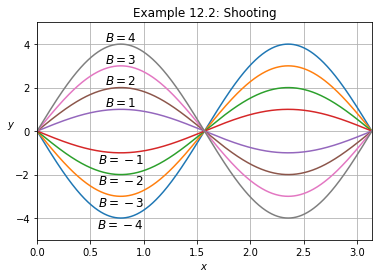

In [2]:
plt.title('Example 12.2: Shooting')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

def y(x, B):
    return B*np.sin(2*x)

for B in (-4, -3, -2, -1, 1, 2, 3, 4):
    plt.plot(x, y(x, B))
    
for B in (-4, -3, -2, -1):
    plt.text(pi/4, y(pi/4, B),'$B='+str(B)+'$', fontsize = 12,
             va = 'top', ha = 'center')
for B in (1, 2, 3, 4):
    plt.text(pi/4, y(pi/4, B),'$B='+str(B)+'$', fontsize = 12,
             va = 'bottom', ha = 'center')

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()

Observe that we saw very different behaviour, simply by changing the coefficient 3 in Example 12.1 to 4 in Example 12.2.

# Eigenvalue problems

Examples 12.1 and 12.2 illustrate the general situation: consider the boundary value problem
$$
	y''(x)+p(x)y'(x)+\lambda q(x)y=0;\hspace{5mm}y(a)=y(b)=0,\tag{3}
$$
for the unknown function $y(x;\lambda)$, where $p$ and $q$ are continuous on the open interval $I$, $\lambda$ is a variable parameter and $a,b\in I$ with $a<b$.

Only for certain (discrete) values of $\lambda$ do we expect (3) to have a nontrivial solution. Furthermore, if $y(x;\lambda)$ is a nontrivial solution, then, since the differential equation is homogeneous, any multiple of $y(x;\lambda)$ is also a solution (corresponding to the same $\lambda$). Making an analogy with linear algebra, we call $\lambda$ an *eigenvalue* of (3) and we call $y(x;\lambda)$ an associated *eigenfunction*.

**Proposition 12.1.** If $y_1(x;\lambda)$ and $y_2(x;\lambda)$ are two linearly independent solutions of the (homogeneous) equation given in (3), then the boundary value problem has a nontrivial solution on $I$ precisely when
$$
	y_1(a;\lambda)y_2(b;\lambda)-y_2(a;\lambda)y_1(b;\lambda)=0.
$$

**Proof.** The general solution to the differential equation is given by
$$
    y(x;\lambda)=Ay_1(x;\lambda)+By_2(x;\lambda)
$$
for arbitrary constants $A$ and $B$. The boundary conditions imply
\begin{align}
    y(a) &= Ay_1(a;\lambda)+By_2(a;\lambda)=0,\\
    y(b) &= Ay_1(b;\lambda)+By_2(b;\lambda)=0,
\end{align}
or in matrix form,
$$
    \left[
        \begin{array}{cc}
            y_1(a;\lambda) & y_2(a;\lambda)\\
            y_1(b;\lambda) & y_2(b;\lambda)
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            A\\
            B
        \end{array}
    \right]
    =0.
$$
The trivial solution is $A=B=0$, and nontrivial solutions exist precisely when the determinant
$$
    \left|
        \begin{array}{cc}
            y_1(a;\lambda) & y_2(a;\lambda)\\
            y_1(b;\lambda) & y_2(b;\lambda)
        \end{array}
    \right|
    =y_1(a;\lambda)y_2(b;\lambda)-y_2(a;\lambda)y_1(b;\lambda)=0.
$$

**Example 12.3.** Determine the eigenvalues and associated eigenfunctions of the boundary value problem
$$
    y''+\lambda y=0;\hspace{5mm}y(0)=y(L)=0\hspace{5mm}(L>0).
$$

**Solution.** We must consider all possible values of $\lambda$: positive, negative and zero.

If $\lambda<0$, say $\lambda=-\alpha^2$ ($\alpha>0$), then the equation takes the form $y''-\alpha^2y=0$, which has general solution $y(x)=Ae^{\alpha x}+Be^{-\alpha x}$. In this case, appealing to Proposition 12.1, we see that
$$
    e^{\alpha L}
    \left|
        \begin{array}{cc}
            1 & 1\\
            e^{\alpha L} & e^{-\alpha L}
        \end{array}
    \right|
    =1-e^{2\alpha L}<0
$$
and so $A=B=0$ is the only solution. Hence $\lambda$ cannot be negative.

Now suppose $\lambda=0$. Then the differential equation reduces to $y''=0$ with general solution $y(x)=Ax+B$ and it is clear that the boundary conditions again force $A=B=0$.

Therefore, we have established that the boundary value problem has only positive eigenvalues and we may write the differential equation in the form $y''+\alpha^2y=0$ ($\alpha>0$). The general solution is then $y(x)=A\cos(\alpha x)+B\sin(\alpha x)$ and
$$
    \left|
        \begin{array}{cc}
            1 & 0\\
            \cos(\alpha L) & \sin(\alpha L)
        \end{array}
    \right|
    =\sin(\alpha L)=0.
$$
Hence the eigenvalues are given by
$$
    \lambda_n=\alpha_n^2=\frac{n^2\pi^2}{L^2}:\hspace{5mm}n=1,2,3,\ldots
$$
To find the corresponding eigenfunctions, we note that the condition $y(0)=0$ implies $A=0$ and hence (taking $B=1$), the associated eigenfunctions are given by
$$
    y_n(x)=\sin\left(\frac{n\pi}{L}x\right).
$$
The first few eigenfunctions are plotted below for $L=1$.

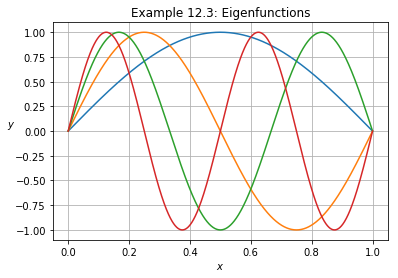

In [23]:
plt.title('Example 12.3: Eigenfunctions')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

L = 1

def y(x, n):
    return np.sin(n*pi*x/L)

x = np.linspace(0, L, 1000)
for n in (1, 2, 3, 4):
    plt.plot(x, y(x, n))

plt.show()

**Note:** In general, the boundary conditions in (3) can take the form
$$a_0y(a)+a_1y'(a)=b_0y(b)+b_1y'(b)=0$$
(i.e. can also depend on the second derivative) and we will still see the same type of behaviour as above, that is to say, we will still see discrete eigenvalues of the problem and corresponding eigenfunctions (see Problem Set 8).